In [1]:
import yaml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def load_df(path):
    # Load data to a dataframe
    with open(path) as f:
        d = yaml.load(f)

    df = pd.DataFrame(columns=['run', 'nworkers', 'method', 'f(x)', 'nfev', 'ng', 'time'])

    for k1 in d.keys():
        for k2 in d[k1].keys():
            for k3 in d[k1][k2].keys():
                s = pd.Series({
                    'run': int(k1.split('=')[-1]),
                    'nworkers': int(k2.split('=')[-1]),
                    'method': k3.split('=')[-1],
                    'f(x)': float(d[k1][k2][k3]['f(x)']),
                    'nfev': float(d[k1][k2][k3]['nfev']),
                    'ng': float(d[k1][k2][k3]['ng']),
                    'time': float(d[k1][k2][k3]['time']),
                })
                df = df.append(s, ignore_index=True)

    return df

df = load_df('results/parallel_results_1.yaml')

In [5]:
# Calculate average results
mean = df.groupby(['method', 'nworkers']).mean()

mean

f(x)       nfev      ng         time
method nworkers                                          
ga     1         2.350557  1000000.0  1000.0  1243.516310
       2         1.903352  1001000.0  1000.0   455.582464
       3         1.836957  1000000.0  1000.0   301.913914
       4         1.677784  1001000.0  1000.0   253.255017
       5         1.992547  1001000.0  1000.0   223.013634
       6         2.064920   997000.0  1000.0   230.114097
       7         2.223912   995000.0  1000.0   197.723294
       8         1.922585  1001000.0  1000.0   202.317860
simple 1         1.767398  1000000.0  1000.0  1235.343416
       2         1.355320  1000000.0  1000.0  1307.941286
       3         1.187535  1000000.0  1000.0  1457.117293
       4         1.630025  1000000.0  1000.0  1673.394603
       5         1.671426  1000000.0  1000.0  1967.033534
       6         1.563468  1000000.0  1000.0  2342.774720
       7         1.778496  1000000.0  1000.0  2710.381757
       8         1.771584  1000000.0  1000.0  3123.306429

Text(0, 0.5, 'f(x)')

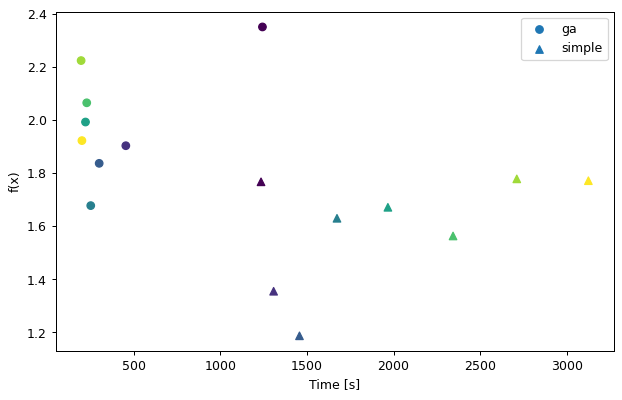

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5), dpi=90)

lab = 'ga'
ax.scatter(
    df.loc[df['method'] == lab, 'time'],
    df.loc[df['method'] == lab, 'f(x)'],
    c=df.loc[df['method'] == lab, 'nworkers'],
    label=lab, marker='o'
)

lab = 'simple'
ax.scatter(
    df.loc[df['method'] == lab, 'time'],
    df.loc[df['method'] == lab, 'f(x)'],
    c=df.loc[df['method'] == lab, 'nworkers'],
    label=lab, marker='^'
)

ax.legend()
ax.set_xlabel('Time [s]')
ax.set_ylabel('f(x)')